In [1]:
# Checking the version of PYTHON; we only support > 3.5
import sys
if sys.version_info < (3,5):
    raise Exception('Please use Python version 3.5 or greater.')
    
# useful additional packages 
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline
import numpy as np
from scipy import linalg as la
from itertools import permutations
from functools import partial
import networkx as nx

# importing the QISKit
from qiskit import QuantumCircuit, QuantumProgram
import Qconfig

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

# import optimization tools
from qiskit.tools.apps.optimization import trial_circuit_ry, SPSA_optimization, SPSA_calibration
from qiskit.tools.apps.optimization import Energy_Estimate, make_Hamiltonian, eval_hamiltonian, group_paulis
from qiskit.tools.qi.pauli import Pauli


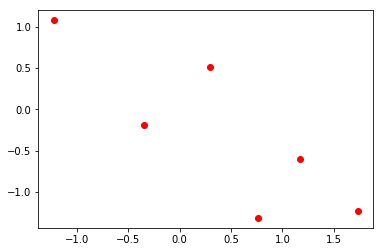

In [45]:
# generate n samples w.r.t bivariate Gaussian
n = 6 # the number of qubits 

mean = [0.0, 0.0]
cov = [[1.0, 0], [0, 1.0]]
X = np.random.multivariate_normal(mean, cov, (2, n))
X = X[:, :, 0]
plt.plot(X[0], X[1],'ro')

In [47]:
Q = np.dot(X.T, X)

In [48]:
# Determining the constant shift and initialize a pauli_list that contains the ZZ Ising terms

pauli_list = []
for i in range(n):
    for j in range(i):
        vp = np.zeros(n)
        wp = np.zeros(n)
        vp[n-i-1] = 1
        vp[n-j-1] = 1
        pauli_list.append((Q[i,j],Pauli(vp,wp)))


In [49]:
# Ground State
pauli_list2 = []
for i in range(n):
    vp = np.zeros(n)
    wp = np.zeros(n)
    w[n-i-1] = 1
    pauli_list2.append((Q[i,i], Pauli(vp, wp)))

In [50]:
#Setting up a quantum program and connecting to the Quantum Experience API
Q_program = QuantumProgram()
# set the APIToken and API url
Q_program.set_api(Qconfig.APItoken, Qconfig.config['url'])

In [51]:
# the entangler step is made of two-qubit gates between a control and target qubit, control: [target]
#entangler_map = {0: [1], 1: [2], 2: [3], 3:[4], 4:[5], 5:[6], 6:[7]}
entangler_map = {0: [1], 1: [2], 2: [3]}

# the coupling_maps gates allowed on the device
coupling_map = None
# the layout of the qubits 
initial_layout = None

# the backend used for the quantum computation
backend = 'local_qasm_simulator' 
# Total number of trial steps used in the optimization
max_trials = 200; 
# Depth of the quantum circuit that prepares the trial state
m = 3     
# initial starting point for the control angles
initial_theta=np.random.randn(m*n)
# number of shots for each evaluation of the cost function (shots=1 corresponds to perfect evaluation, 
# only available on the simulator)
shots = 1
# choose to plot the results of the optimizations every save_steps 
save_step = 1

initial_c=0.1
target_update=2*np.pi*0.1

H=make_Hamiltonian(pauli_list)

In [52]:
def cost_function(Q_program,H,n,m,entangler_map,shots,device,theta):    
    return eval_hamiltonian(Q_program,H,trial_circuit_ry(n,m,theta,entangler_map,None,False),shots,device).real

In [53]:
SPSA_params = SPSA_calibration(partial(cost_function,Q_program,H,n,m,entangler_map,
                                           shots,backend),initial_theta,initial_c,target_update,25)

calibration step # 0 of 25
calibration step # 5 of 25
calibration step # 10 of 25
calibration step # 15 of 25
calibration step # 20 of 25
calibrated SPSA_parameters[0] is 0.1885489611184831


In [54]:
best_distance_quantum, best_theta, cost_plus, cost_minus, _, _ = SPSA_optimization(partial(cost_function,Q_program,H,n,m,entangler_map,shots,backend),
                                                           initial_theta,SPSA_params,max_trials,save_step,1);

objective function at theta+ for step # 0
-1.235165672844207
objective function at theta- for step # 0
-1.72392015141017
objective function at theta+ for step # 1
2.0623965222875453
objective function at theta- for step # 1
2.0348531654432875
objective function at theta+ for step # 2
2.597676411916164
objective function at theta- for step # 2
1.5763604882084425
objective function at theta+ for step # 3
0.6844540453412629
objective function at theta- for step # 3
0.9684089135326319
objective function at theta+ for step # 4
0.3694824524398681
objective function at theta- for step # 4
0.9071624000900456
objective function at theta+ for step # 5
0.45553546570819803
objective function at theta- for step # 5
-0.031044938174144443
objective function at theta+ for step # 6
-0.5116442409403423
objective function at theta- for step # 6
0.005384885151337171
objective function at theta+ for step # 7
-0.6407266257694217
objective function at theta- for step # 7
-1.168469679140547
objective function

objective function at theta+ for step # 67
-4.932829875647165
objective function at theta- for step # 67
-5.081756398977688
objective function at theta+ for step # 68
-4.967272052327225
objective function at theta- for step # 68
-4.940849426622838
objective function at theta+ for step # 69
-5.0727301699986524
objective function at theta- for step # 69
-4.951621680721561
objective function at theta+ for step # 70
-4.94059503155013
objective function at theta- for step # 70
-4.959481160430003
objective function at theta+ for step # 71
-5.092237751353625
objective function at theta- for step # 71
-4.996985357645407
objective function at theta+ for step # 72
-4.96995224846152
objective function at theta- for step # 72
-5.0387974310984465
objective function at theta+ for step # 73
-5.007930901166169
objective function at theta- for step # 73
-5.031278785178445
objective function at theta+ for step # 74
-5.008241139482435
objective function at theta- for step # 74
-4.946120427822103
objectiv

objective function at theta+ for step # 133
-5.0538135241769515
objective function at theta- for step # 133
-5.079358311519661
objective function at theta+ for step # 134
-5.122651603146951
objective function at theta- for step # 134
-5.117158316151222
objective function at theta+ for step # 135
-5.167207463688516
objective function at theta- for step # 135
-5.0974824304225494
objective function at theta+ for step # 136
-5.146511477354771
objective function at theta- for step # 136
-5.128497459570726
objective function at theta+ for step # 137
-5.062823968588407
objective function at theta- for step # 137
-5.096085835416458
objective function at theta+ for step # 138
-5.05801169304333
objective function at theta- for step # 138
-5.058436894295744
objective function at theta+ for step # 139
-5.1033685366964345
objective function at theta- for step # 139
-5.088407445542078
objective function at theta+ for step # 140
-5.123481765303999
objective function at theta- for step # 140
-5.064175

objective function at theta+ for step # 199
-5.197290807208597
objective function at theta- for step # 199
-5.172730493840991
Final objective function is: -5.245264987916526
